**Import Data**

In [1]:
# import appropriate packages
import numpy as np
import pandas as pd

In [2]:
# read the excel file
# had to install the xlrd package to read the file 
# adjusted the names of the columns to make them easier to handle 
cols = ['I1', 'I2', 'I3', 'pIPO', 'pH', 'pL', 'p1day', 'C1', 'C2', 'C3', 'C4', 
        'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3']
df = pd.read_excel("../Competition1_raw_data.xlsx", names=cols)
df.head(10)

,I1,I2,I3,pIPO,pH,pL,p1day,C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10,9.5,8.5,11.87,122,1,3.43,...,10600000,51.345,470,12719,11560,301,690,62,117,139
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8,10,8,7.25,259,0,-1.62,...,2400000,25.936,791,21792,19585,510,1120,71,242,237
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7,14,12,6.7,90,1,-1.24,...,5000000,7.378,201,5262,4785,128,325,61,33,60
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16,14,12.39,209,1,-0.91,...,4500000,8.526,328,8259,7574,177,509,80,59,110
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21,21,19,56.6,80,1,0.07,...,8250000,632.298,572,14830,13176,336,720,67,149,167
5,ACOM,Ancestry.com Inc.,7379,13.5,14.5,12.5,14.2,94,1,0.06,...,7407407,197.591,510,17999,13934,328,815,62,96,181
6,ACOR,ACORDA THERAPEUTICS INC,2836,6,13,11,6.72,128,1,-1.87,...,5500000,5.146,495,15758,13953,379,698,82,106,135
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5,14,12,4.55,91,0,-0.74,...,8000000,-,334,11226,10056,276,-1,55,120,122
8,ACTV,ACTIVE NETWORK INC,7372,15,18,16,15.9,100,1,-0.51,...,11000000,279.6,620,14813,13463,335,917,58,124,234
9,ACW,ACCURIDE CORP,3714,9,19,17,0,106,1,1.49,...,11000000,494.008,385,9134,8107,198,459,81,90,147


In [3]:
# did not include column C2 as it is a binary varible and needs a different type of imputation 
# must remember to add column back in to dataframe at the end of notebook 
dfx = df.filter(['C1', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3'])
dfx.head()

,C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,122,3.43,0.0290743,40962052,10600000,51.345,470,12719,11560,301,690,62,117,139
1,259,-1.62,-0.0133516,28869196,2400000,25.936,791,21792,19585,510,1120,71,242,237
2,90,-1.24,0.020715,16845668,5000000,7.378,201,5262,4785,128,325,61,33,60
3,209,-0.91,0.0200231,14848637,4500000,8.526,328,8259,7574,177,509,80,59,110
4,80,0.07,-0.0348947,30741716,8250000,632.298,572,14830,13176,336,720,67,149,167


In [4]:
# df c2 dataframe will be used for imputation later 
dfc2 = df.filter(['C2'])
dfc2.head()

,C2
0,1
1,0
2,1
3,1
4,1


In [5]:
# created a dataframe for the target (y) variables 
# these variables are not imputed
dfy = df.filter(['pIPO', 'pH', 'pL', 'p1day'])
dfy.head()

,pIPO,pH,pL,p1day
0,10,9.5,8.5,11.87
1,8,10,8,7.25
2,7,14,12,6.7
3,11.5,16,14,12.39
4,21,21,19,56.6


In [6]:
# created a dataframe just for the  ID variables 
dfid = df.filter(['I1', 'I2', 'I3'])
dfid.head()

,I1,I2,I3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834
2,ACAD,ACADIA PHARMACEUTICALS INC,2834
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492


In [7]:
# replaced missing ('-') values in dfy with NaN and changed datatype
dfy.replace(to_replace='-', value=np.nan, inplace=True)
dfy.head(10)

,pIPO,pH,pL,p1day
0,10.0,9.5,8.5,11.870000
1,8.0,10.0,8.0,7.250000
2,7.0,14.0,12.0,6.700000
3,11.5,16.0,14.0,12.390000
4,21.0,21.0,19.0,56.599998
5,13.5,14.5,12.5,14.200000
6,6.0,13.0,11.0,6.720000
7,5.0,14.0,12.0,4.550000
8,15.0,18.0,16.0,15.900000
9,9.0,19.0,17.0,0.000000


In [8]:
# verifying that '-' was replaced with NaN and the datatypes were changed to floats 
dfy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 4 columns):
pIPO     677 non-null float64
pH       672 non-null float64
pL       672 non-null float64
p1day    660 non-null float64
dtypes: float64(4)
memory usage: 21.4 KB


**Examining the DataFrame dfx**

In [9]:
# exmaining the columns
# know that this is not entirely accurate because the missing values are represented by "-" not NaN
# we can see that all the dtypes are objects 
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 14 columns):
C1    682 non-null object
C3    682 non-null object
C4    682 non-null object
C5    682 non-null object
C6    682 non-null object
C7    682 non-null object
T1    682 non-null object
T2    682 non-null object
T3    682 non-null object
T4    682 non-null object
T5    682 non-null object
S1    682 non-null object
S2    682 non-null object
S3    682 non-null object
dtypes: object(14)
memory usage: 74.7+ KB


In [10]:
# loooking for missing values
print(dfx.isnull().sum(axis=0).tolist())

# again, we know this output is not entirely accurate 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [11]:
# replace '-' with NaN in dfx
# this makes imputing the data with the mean easier later 
dfx.replace(to_replace='-', value=np.nan, inplace=True)
dfx.head(10)

,C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,122.0,3.43,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,259.0,-1.62,-0.013352,28869196.0,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,90.0,-1.24,0.020715,16845668.0,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,209.0,-0.91,0.020023,14848637.0,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,80.0,0.07,-0.034895,30741716.0,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0
5,94.0,0.06,-0.057556,42402916.0,7407407.0,197.591,510.0,17999.0,13934.0,328.0,815.0,62.0,96.0,181.0
6,128.0,-1.87,0.004106,19047022.0,5500000.0,5.146,495.0,15758.0,13953.0,379.0,698.0,82.0,106.0,135.0
7,91.0,-0.74,0.040620,19371750.0,8000000.0,NaN,334.0,11226.0,10056.0,276.0,-1.0,55.0,120.0,122.0
8,100.0,-0.51,-0.029316,52982501.0,11000000.0,279.600,620.0,14813.0,13463.0,335.0,917.0,58.0,124.0,234.0
9,106.0,1.49,-0.024925,33622690.0,11000000.0,494.008,385.0,9134.0,8107.0,198.0,459.0,81.0,90.0,147.0


In [12]:
# get dfx info again 
# see that we have more accurate counts of non null entries and data types have been changed to float64 for approproate columns
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 14 columns):
C1    660 non-null float64
C3    646 non-null float64
C4    660 non-null float64
C5    676 non-null float64
C6    676 non-null float64
C7    610 non-null float64
T1    681 non-null float64
T2    681 non-null float64
T3    681 non-null float64
T4    681 non-null float64
T5    681 non-null float64
S1    681 non-null float64
S2    681 non-null float64
S3    681 non-null float64
dtypes: float64(14)
memory usage: 74.7 KB


In [13]:
# count of number of missing records in each column of dfx 
val = []
for col in dfx.columns:
    val.append(dfx[dfx.columns].isnull().sum())
    break
print(val)

# now we know how many values are missing in each column

[C1    22
C3    36
C4    22
C5     6
C6     6
C7    72
T1     1
T2     1
T3     1
T4     1
T5     1
S1     1
S2     1
S3     1
dtype: int64]


**Descriptive Stats - Before Imputation**

In [14]:
## descriptive stats on the dfx dataframe before imputation 
dfx.describe()

,C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,660.000000,646.000000,660.000000,6.760000e+02,6.760000e+02,610.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,149.728788,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,152.817467,162.666532,0.033318,1.043764e+08,2.512855e+07,1648.337634,175.741647,5449.644597,4839.670179,121.532637,472.914323,39.096525,84.828959,69.276285
min,10.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,85.000000,-0.852500,-0.013927,1.871417e+07,5.000000e+06,37.245750,351.000000,9195.000000,8162.000000,213.000000,462.000000,45.000000,73.000000,100.000000
50%,107.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000
75%,155.250000,0.470000,0.031571,4.980786e+07,1.200000e+07,331.138000,551.000000,15241.000000,13760.000000,354.000000,795.000000,85.000000,142.000000,173.000000
max,2087.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000


In [15]:
# median of each column in dfx 
dfx.median()

C1    1.070000e+02
C3    1.000000e-02
C4    9.124591e-03
C5    2.740018e+07
C6    7.398704e+06
C7    1.038330e+02
T1    4.440000e+02
T2    1.204500e+04
T3    1.078500e+04
T4    2.790000e+02
T5    6.240000e+02
S1    6.000000e+01
S2    1.000000e+02
S3    1.340000e+02
dtype: float64

**Visual EDA of variables before Imputation**

In [16]:
# Show distribution of all variables in dfx
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use('ggplot')

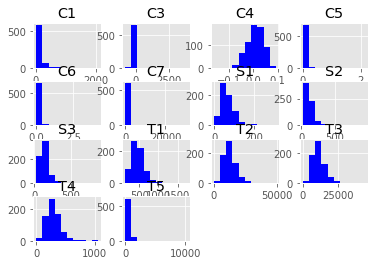

In [17]:
# may help to identify which variables need to be normalized 
for col in dfx.columns:
    dfx.hist(color='blue')
    break
plt.show()

**Imputation dfx**

In [18]:
# replace null value with mean because we have continuous variables 
# replacing with median because the central tendency of the variables is too skewed to use the mean 
for value in dfx.columns:
    dfx.fillna(dfx.median(), inplace=True)
print(dfx.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [19]:
# just checking that the NaN values were replaced with the median of the column
dfx.head(10)

,C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,122.0,3.43,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,259.0,-1.62,-0.013352,28869196.0,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,90.0,-1.24,0.020715,16845668.0,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,209.0,-0.91,0.020023,14848637.0,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,80.0,0.07,-0.034895,30741716.0,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0
5,94.0,0.06,-0.057556,42402916.0,7407407.0,197.591,510.0,17999.0,13934.0,328.0,815.0,62.0,96.0,181.0
6,128.0,-1.87,0.004106,19047022.0,5500000.0,5.146,495.0,15758.0,13953.0,379.0,698.0,82.0,106.0,135.0
7,91.0,-0.74,0.040620,19371750.0,8000000.0,103.833,334.0,11226.0,10056.0,276.0,-1.0,55.0,120.0,122.0
8,100.0,-0.51,-0.029316,52982501.0,11000000.0,279.600,620.0,14813.0,13463.0,335.0,917.0,58.0,124.0,234.0
9,106.0,1.49,-0.024925,33622690.0,11000000.0,494.008,385.0,9134.0,8107.0,198.0,459.0,81.0,90.0,147.0


**Imputation C2**

In [20]:
# not accurate because it is not recognizing '-' as null values 
val = []
for col in dfc2.columns:
    val.append(dfc2[dfc2.columns].isnull().sum())
    break
print(val)

[C2    0
dtype: int64]


In [21]:
# replace '-' with NaN
dfc2.replace(to_replace='-', value=np.nan, inplace=True)

In [22]:
# get a more accurate count of missing values 
val = []
for col in dfc2.columns:
    val.append(dfc2[dfc2.columns].isnull().sum())
    break
print(val)

[C2    22
dtype: int64]


In [23]:
# impute C2 with the mode 
dfc2['C2'].fillna(dfc2['C2'].mode()[0], inplace=True)

In [24]:
# verify that NaN value were filled with the mode 
# count of missing values. should be 0 
val = []
for col in dfc2.columns:
    val.append(dfc2[dfc2.columns].isnull().sum())
    break
print(val)

[C2    0
dtype: int64]


**Decriptive Stats dfx - After Imputation**

In [25]:
dfx.describe()

,C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,682.000000,682.000000,682.000000,6.820000e+02,6.820000e+02,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.00000,682.000000
mean,148.350440,1.695003,0.007342,4.916458e+07,1.237106e+07,458.587321,465.602639,12757.560117,11394.948680,294.331378,679.139296,68.409091,120.07478,144.743402
std,150.518513,158.309101,0.032777,1.039359e+08,2.502200e+07,1563.531760,175.614521,5445.710476,4836.172083,121.444797,472.571706,39.069141,84.77015,69.226629
min,10.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.00000,26.000000
25%,85.000000,-0.750000,-0.013352,1.874682e+07,5.004180e+06,41.511500,351.250000,9195.750000,8168.000000,213.250000,462.250000,45.000000,73.00000,100.000000
50%,107.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.00000,134.000000
75%,152.750000,0.440000,0.030941,4.936364e+07,1.193426e+07,289.758000,550.750000,15240.250000,13751.500000,353.750000,794.500000,84.750000,141.75000,173.000000
max,2087.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.00000,883.000000


In [26]:
dfx.median()

C1    1.070000e+02
C3    1.000000e-02
C4    9.124591e-03
C5    2.740018e+07
C6    7.398704e+06
C7    1.038330e+02
T1    4.440000e+02
T2    1.204500e+04
T3    1.078500e+04
T4    2.790000e+02
T5    6.240000e+02
S1    6.000000e+01
S2    1.000000e+02
S3    1.340000e+02
dtype: float64

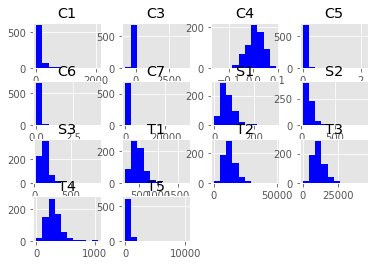

In [27]:
# showing histogram for x variables after imputation
# no significant change to distribution because we have not adjusted the skew of the data 
for col in dfx.columns:
    dfx.hist(color='blue')
    break
plt.show()

**Add New Columns**

In [28]:
# add new columns Y1, Y2, C3', C5', C6' using np.where
# tried doing this with a for loop - didn't work 
# columns also created in Alex's notebook for normalization  
dfy['Pmid'] = (dfy['pH'] + dfy['pL'])/2 
dfy['Y1'] = np.where(dfy['pIPO']<dfy['Pmid'], 1,0)
dfy['Y2'] = np.where(dfy['pIPO']<dfy['p1day'], 1,0)
dfx['C3p'] = np.where(dfx['C3']<0, 1,0)
dfx['C5p'] = dfx['C5']/dfx['C6']
dfx['C6p'] = np.where(dfy['pIPO']>dfy['Pmid'], (((dfy['pIPO'] - dfy['Pmid']))/dfy['Pmid']) * 100,0)

dfx = dfx.drop(['C3','C5','C6'],axis=1)
# check that new columns were created
dfx.head()

,C1,C4,C7,T1,T2,T3,T4,T5,S1,S2,S3,C3p,C5p,C6p
0,122.0,0.029074,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0,0,3.864345,11.111111
1,259.0,-0.013352,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0,1,12.028832,0.000000
2,90.0,0.020715,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0,1,3.369134,0.000000
3,209.0,0.020023,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0,1,3.299697,0.000000
4,80.0,-0.034895,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0,0,3.726269,5.000000


In [29]:
# Define Long Sentences
def LongSentences(row):
    return row['T4']/row['T1']
    
# add a new column with the values returned from the previous function
dfx['T4p'] = dfx.apply(lambda row: LongSentences(row),axis=1)

In [30]:
# Define Real Words
def RealWords(row):
    if row['T2'] == 0 :
        return 0
    else: 
        return row['T3']/row['T2']

# add a new column with the values returned from the previous function
dfx['T3p'] = dfx.apply(lambda row: RealWords(row),axis=1)

In [31]:
# Define Long Words
def LongWords(row):
    if row['T2'] == 0 :
        return 0
    else: 
        return row['T5']/row['T2']
    
# add a new column with the values returned from the previous function
dfx['T5p'] = dfx.apply(lambda row: LongWords(row),axis=1)

In [32]:
# Define Positive Words
def PositiveWords(row):
    if row['T2'] == 0 :
        return 0
    else: 
        return row['S1']/row['T2']
    
# add a new column with the values returned from the previous function
dfx['S1p'] = dfx.apply(lambda row: PositiveWords(row),axis=1)

In [33]:
# Define Negative Words
def NegativeWords(row):
    if row['T2'] == 0 :
        return 0
    else: 
        return row['S2']/row['T2']
    
# add a new column with the values returned from the previous function
dfx['S2p'] = dfx.apply(lambda row: NegativeWords(row),axis=1)

In [34]:
# Define Uncertain Words
def UncertainWords(row):
    if row['T2'] == 0 :
        return 0
    else: 
        return row['S3']/row['T2']
    
# add a new column with the values returned from the previous function
dfx['S3p'] = dfx.apply(lambda row: UncertainWords(row),axis=1)

In [35]:
# check that columns were created and old columns were dropped 
dfx = dfx.drop(['T1','T2','T3','T4','T5','S1','S2','S3'],axis=1)
dfx.head()

,C1,C4,C7,C3p,C5p,C6p,T4p,T3p,T5p,S1p,S2p,S3p
0,122.0,0.029074,51.345,0,3.864345,11.111111,0.640426,0.908876,0.054250,0.004875,0.009199,0.010929
1,259.0,-0.013352,25.936,1,12.028832,0.000000,0.644753,0.898724,0.051395,0.003258,0.011105,0.010876
2,90.0,0.020715,7.378,1,3.369134,0.000000,0.636816,0.909350,0.061764,0.011593,0.006271,0.011403
3,209.0,0.020023,8.526,1,3.299697,0.000000,0.539634,0.917060,0.061630,0.009686,0.007144,0.013319
4,80.0,-0.034895,632.298,0,3.726269,5.000000,0.587413,0.888469,0.048550,0.004518,0.010047,0.011261


In [36]:
# check that C6p was created 
dfy.head()

,pIPO,pH,pL,p1day,Pmid,Y1,Y2
0,10.0,9.5,8.5,11.870000,9.0,0,1
1,8.0,10.0,8.0,7.250000,9.0,1,0
2,7.0,14.0,12.0,6.700000,13.0,1,0
3,11.5,16.0,14.0,12.390000,15.0,1,1
4,21.0,21.0,19.0,56.599998,20.0,0,1


In [37]:
dfx = pd.concat([dfx, dfc2], axis=1)
dfx.head()

,C1,C4,C7,C3p,C5p,C6p,T4p,T3p,T5p,S1p,S2p,S3p,C2
0,122.0,0.029074,51.345,0,3.864345,11.111111,0.640426,0.908876,0.054250,0.004875,0.009199,0.010929,1.0
1,259.0,-0.013352,25.936,1,12.028832,0.000000,0.644753,0.898724,0.051395,0.003258,0.011105,0.010876,0.0
2,90.0,0.020715,7.378,1,3.369134,0.000000,0.636816,0.909350,0.061764,0.011593,0.006271,0.011403,1.0
3,209.0,0.020023,8.526,1,3.299697,0.000000,0.539634,0.917060,0.061630,0.009686,0.007144,0.013319,1.0
4,80.0,-0.034895,632.298,0,3.726269,5.000000,0.587413,0.888469,0.048550,0.004518,0.010047,0.011261,1.0


In [38]:
# verify dtypes before moving on 
dfx.dtypes

C1     float64
C4     float64
C7     float64
C3p      int64
C5p    float64
C6p    float64
T4p    float64
T3p    float64
T5p    float64
S1p    float64
S2p    float64
S3p    float64
C2     float64
dtype: object

**Write dataframes to csv files**

In [39]:
dfx.to_csv('../csv_files/p1xmedian.csv')

In [40]:
dfy.to_csv('../csv_files/y.csv')

In [41]:
dfid.to_csv('../csv_files/id.csv')